<img src = 'Imagens/logo data.aqa.jpg' width >

<br>

#  <span style = "font-family:Times New Roman"><font color = #0f4e8c>Teste U de Mann-Whitney / Wilcoxon Soma de Ranking
    
<br>


<br>

###  <span style = "font-family:Times New Roman"><font color = #0f4e8c> Objetivo
    
<br>

Esta aula tem como objetivo apresentar o  que é o Teste do U Mann-Whitney (também chamado de Wilcoxon Soma de Ranking), como é feito o seu cálculo e quais são as suas aplicações. 

<br>

###  <span style = "font-family:Times New Roman"><font color = #0f4e8c> O que é o Teste ? 
    
<br>

<br>

O Teste do U de Mann-Whitney é um teste não parâmetrico realizado para verificar se a distribuição de duas populações independentes é igual ou não. A formulação da hipótese nula ocorre como o  postulado abaixo :

<br>


###  <span style = "font-family:Times New Roman"> $H_0$ : $\theta$x <font color = #1ba106> **=** <font color = black> $\theta$y    
###  <span style = "font-family:Times New Roman"> $H_A$ : $\theta$x <font color = #f2820a> **≠** <font color = black>$\theta$y

<br>

Verifica-se, portanto se uma distribuição $\theta$x é igual a uma $\theta$y. Se as distribuições forem diferentes, rejeita-se  H0. 

Para validar se as distribuições são iguais ou não, juntam-se as duas populações em uma só e ordena-se um ranking de acordo com os seus valores. 

Se os valores da ordenação do ranking tendem a estar agrupados com as amostras de uma só população em um determinado intervalo do ranking (Representação I da imagem abaixo), é possível que haja diferença entre as distribuições. Se as duas populações estiverem esparsas, é provável que não haja diferença (Representação II da imagem abaixo). 

<br>


<br>

<img src ='Imagens/Mann Whitney Rankeamento.png' height = 20 width = 800 > 

<br>

<span style = "font-family:Times New Roman"> <font color = #777877> <center> Fonte: Elaboração própria, baseado em Corder G. W., Foreman D. I., Nonparametric Statistics : A Step-by-Step Approach, 2014</center>

<br>

Um ponto interessante do cálculo do U Mann-Whitney é que ele pode ser efetuado quando as duas amostras possuem quantidade de registros distintas, o que traz uma flexibilização maior para as aplicações do teste. 

<br>


<br>

## <span style = "font-family:Times New Roman"><font color = #0f4e8c> Como calcular ? 
    
<br>
    
    

<br>
    
#  <center> $U_i = n_1n_2 +  \displaystyle \frac{n_i(n_i + 1)}{2} - \sum{R_i} $  </center>

<br>

Onde :

$U_i$ = valor do teste para a amostra i ;

$n_i$ = Quantidade de registros para amostra i;

$R_i$ = Ranking da amostra i

<br>



<br>

O U de Mann-Whitney é calculado pela fórmula acima. Calcula-se o $U$ para cada uma das populações independentes e, após feito o cálculo, o U para a inferência do teste de Mann-Whitney é aquele que registrar o menor valor, assim como na representação matemática abaixo :

<br>


<br>

## <center> $U = min (U_1,U_2)$ </center>

<br>


<br>

Se o valor crítico para o nível de confiança previamente determinado for menor que o  $U$ de Mann-Whitney, aceita-se a hipótese nula de que não há diferença entre as distribuições. Se o valor crítico for maior ou igual o $U$ , rejeita-se H0. 

Os valores críticos podem ser obtidos através de tabelas estatísticas de acordo com o nível de confiança estabelecido, assim como visto em outras aulas. Como serão utilizadas bibliotecas para realizar os cálculos, não efetuaremos o teste manualmente. 

<br>


<br>

##   <span style = "font-family:Times New Roman"><font color = #0f4e8c> Exercício 
    
<br>
   

<br>

Neste primeiro exercício iremos avaliar o índice de empreendedorismo das mulheres em países desenvolvidos com relação ao índice  de empreendedorismo das mulheres de países  em desenvolvimento. O conjunto de dados foi extraído do ***Women Entrepreneurship Index*** e do  ***Global Entrepreneurship Index*** que foi publicado em 2015. Os dados podem ser acessados através do **[Kaggle.](https://www.kaggle.com/datasets/babyoda/women-entrepreneurship-and-labor-force)**  

Consideraremos um nível de 95 % de confiança para a realização do Teste do U de Mann-Whitney.
<br>


<br>

###  <span style = "font-family:Times New Roman"><font color = #0f4e8c> Elaboração da Hipótese 

<br>    


O primeiro passo antes do cálculo do teste é a elaboração da Hipótese Nula. Neste exercício será postulado o seguinte :  

<br>


### <span style = "font-family:Times New Roman"> $H_0$ : A distribuição do índice nos países desenvolvidos é <font color = #1ba106> igual <font color = black> a dos em desenvolvimento.   
###  <span style = "font-family:Times New Roman">  $H_A$ : A distribuição do índice nos países desenvolvidos é <font color = #f2820a> diferente <font color = black> da distribuição do índice nos países em desenvolvimento.   
    
<br>
    
<br>
    


Agora carregaremos e olharemos o dataset para aferir as informações necessárias para o cálculo do teste 

<br>


In [1]:
# Carregando os dados 

import pandas as pd

women_enterpreneship = pd.read_csv('dados/women_enterpreneuship.csv', sep = ';', usecols= [1,2,5])

In [2]:
# Verificando informações gerais do Dataset 

women_enterpreneship.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       51 non-null     object 
 1   Level of development          51 non-null     object 
 2   Women Entrepreneurship Index  51 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


In [3]:
# Visualizando a tabela   

women_enterpreneship.head(3)

,Country,Level of development,Women Entrepreneurship Index
0,Austria,Developed,54.9
1,Belgium,Developed,63.6
2,Estonia,Developed,55.4


In [4]:
# Vendo os níveis de desenvolvimento disponíveis  

women_enterpreneship['Level of development'].unique()

array(['Developed', 'Developing'], dtype=object)


<br>

Podemos ver que o dataset possui os países em Desenvolvimento e os países Desenvolvidos. Iremos repartir estas duas variáveis em dois conjuntos de dados diferentes para a realização do teste no Pingouin.

<br>


In [5]:
# Selecionando as variáveis de interesse 

developed = women_enterpreneship[women_enterpreneship['Level of development'] == 'Developed']
developing = women_enterpreneship[women_enterpreneship['Level of development'] == 'Developing']


<br>

Conseguimos realizar o teste do U de Mann-Whitney através da função **<font color = #0f4e8c>mwu** <font color = black> do Pingouin. A biblioteca requer somente dois parâmetros para a realização do teste, que são as amostras independentes (no nosso caso, "developing" e "developed"). 
    
O valor do teste $U$ que é apresentado pela biblioteca não é o menor entre as duas distribuições, mas sim aquele que é colocado como o primeiro argumento. Mais detalhes sobre os parâmetros da função podem ser acessados no site do **[pacote.](https://pingouin-stats.org/generated/pingouin.mwu.html#pingouin.mwu)**


De qualquer maneira, não precisamos do valor U do teste e nem do valor crítico para inferir resultados, isso porque a função apresenta o resultado do p-valor, o que permite a interpretação do teste.

<br>


In [6]:
# Importando a biblioteca do Pingouin e realizando o teste 

import pingouin as pg

pg.mwu(developing['Women Entrepreneurship Index'], developed['Women Entrepreneurship Index'])

,U-val,alternative,p-val,RBC,CLES
MWU,6.0,two-sided,2.075716e-09,0.981481,0.009259



<br>

Como o p-valor é de 0,00000000207, vemos que o resultado do teste é extremamente significativo e que as distribuições são completamente distintas. Para exemplificar, a chance de obter valores iguais ou superiores aos apresentados pelas distribuições é equivalente a duas em um bilhão. Agora iremos visualizar estas distribuições através de boxplots.

<br>


###  <span style = "font-family:Times New Roman"><font color = #0f4e8c> Visualizando as Distribuições 

<br> 
    

In [7]:
# importando bibliotecas para construir a visualização 

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

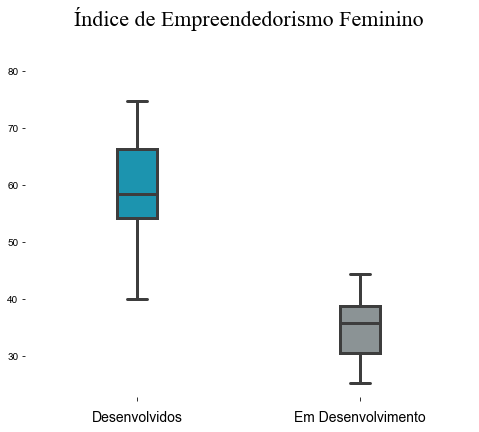

In [8]:
# Configurações de legenda

csfont = {'fontname':'Times New Roman'}
paises = ['Desenvolvidos', 'Em Desenvolvimento']
paleta = ['#04a3c7','#8a9496']

# Configurações da formatação da figura

fig = plt.gcf()
ax = plt.subplot()
ax.spines[['right','left','top','bottom']].set_visible(False)
fig.set_size_inches(8, 6)
sns.set_theme(style="white")

# Criando o boxplot

sns.boxplot(x = 'Level of development', y = 'Women Entrepreneurship Index', data = women_enterpreneship, 
            width = 0.18, palette =paleta, linewidth= 3 )



# Atribuindo e modificando títulos 

plt.xlabel('')
plt.ylabel('')
plt.yticks(np.arange(30,90,10))
plt.xticks([0,1],labels = paises, fontsize = 14, y = - 0.02)
plt.title('Índice de Empreendedorismo Feminino', **csfont,fontsize = 22, y = 1.12 )


plt.show()

<br> 

**Conclusão :** Podemos inferir que a diferença das distribuições dos índices de empreendedorismo feminino dos países desenvolvidos com relação aos países em desenvolvimento não é aleatória. 

A divergência das distribuições, que pode ser visualizada através do boxplot acima, é estatísticamente significativa a um nível de 95 % de confiança. Inclusive, os níveis de confiança poderiam ser aumentados consideravelmente e ainda assim rejeitaríamos a hipótese nula de que as distribuições são idênticas. 

<br> 


<br>

##   <span style = "font-family:Times New Roman"><font color = #0f4e8c> Exercício II 
    
<br>
   

<br>

No segundo exercício iremos avaliar o resultado da implementação de um tratamento para artrítes reumatóide realizado no estudo de Koch & Edwards (1988) . Nele houveram pacientes que receberam um placebo e houveram pacientes que receberam o remédio para o tratamento da artríte. 

Iremos avaliar se existiu, para os pacientes do sexo masculino, um efeito positivo do tratamento proposto.


O nível de significância a ser considerado é de 5 %. 

<br>


<br>

###  <span style = "font-family:Times New Roman"><font color = #0f4e8c> Elaboração da Hipótese 

<br>    


### <span style = "font-family:Times New Roman"> $H_0$ : A distribuição dos pacientes masculinos que receberam o Placebo é <font color = #1ba106> igual <font color = black> a distribuição dos que receberam tratamento.   
###  <span style = "font-family:Times New Roman">  $H_1$ : A distribuição dos pacientes masculinos que receberam o Placebo é <font color = #f2820a> diferente <font color = black> da distribuição dos que receberam tratamento.  
    
<br>
    
<br>
    

In [9]:
# Carregando o conjunto de dados

arthritis_data = pd.read_csv('dados/Arthritis.csv', usecols = [2,3,4,5])

In [10]:
# Visualizando os dados 

arthritis_data

,Treatment,Sex,Age,Improved
0,Treated,Male,27,Some
1,Treated,Male,29,None
2,Treated,Male,30,None
3,Treated,Male,32,Marked
4,Treated,Male,46,Marked
...,...,...,...,...
79,Placebo,Female,66,None
80,Placebo,Female,66,None
81,Placebo,Female,66,Some
82,Placebo,Female,68,Some


<br>

Podemos ver que será necessário realizar uma adequação do conjunto de dados antes da realização do teste. 

A coluna "Sex", por exemplo, possui o resultado de homens e mulheres, mas o exercício pediu para avaliar o resultado do tratamento somente nos pacientes masculinos. Além disso, a variável "Improved", que demonstra qual foi o efeito do tratamento, é categórica e não númerica.

Portanto, para realizar o teste do U de Mann-Whitney, iremos primeiro aplicar valores às variáveis categóricas e, após isso, iremos filtrar o dataset para os valores do sexo masculino.

Os valores da coluna "Improved" que são iguais à "None", indicam que não houve efeito do tratamento, os que são iguais à "Some" indicam que houve algum efeito, e os que são iguais à "Marked" indicam que houve um efeito acentuado do tratamento.

Para avaliar o efeito do tratamento quantitativamente iremos colocar que os valores de "None" são iguais 0, "Some" são iguais 0.5 e "Marked" são iguais 1. Estes valores ficarão atribuídos na coluna "Results".

<br>


In [11]:
categories = []

# Atribuindo valores ao resultado do tratamento

for result in arthritis_data['Improved'] :
    
    if result == 'None' :
        categories.append(0)
        
    elif result == 'Some' :
        categories.append(0.5)
        
    else :
        categories.append(1)

In [12]:
# Passando os valores númericos do efeito do tratamento para a coluna "Results"

arthritis_data['Results'] = categories

In [13]:
arthritis_data.head(3)

,Treatment,Sex,Age,Improved,Results
0,Treated,Male,27,Some,0.5
1,Treated,Male,29,None,0.0
2,Treated,Male,30,None,0.0


<br>

Agora que cada uma das categorias do resultado do tratamento possui um valor númerico atribuído, iremos realizar a filtragem do conjunto de dados, para os pacientes homens que receberam o placebo e para os pacientes homens que  receberam o tratamento.

Após isso conseguiremos realizar o teste no pingoun. 

<br> 


In [14]:
# Filtrando os dados

treated_man =  arthritis_data.query('Treatment == "Treated" & Sex == "Male"')
non_treated_man =  arthritis_data.query('Treatment == "Placebo" & Sex == "Male"')

In [15]:
# Realizando o teste 

pg.mwu(treated_man['Results'], non_treated_man['Results'])

,U-val,alternative,p-val,RBC,CLES
MWU,107.5,two-sided,0.045177,-0.396104,0.698052


<br>

Podemos observar que o resultado do p-valor é 0.045 e que portanto, os resultados não são aleatórios a um nível de 5 % de significância, isso indica que há diferença entre as duas distribuições. Iremos explorar visualmente estes resultados.  

<br>


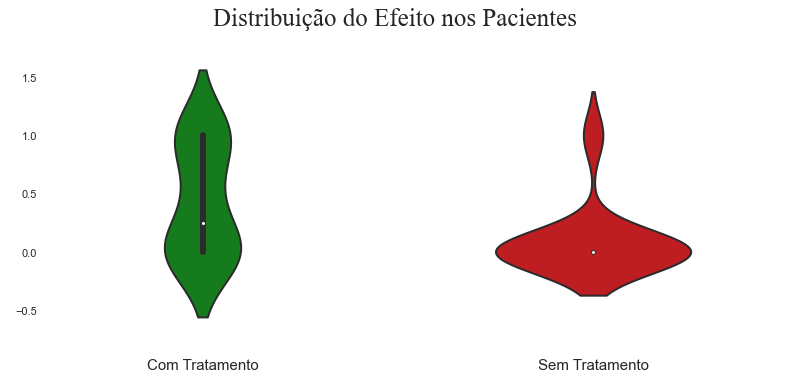

In [16]:
man_data  =  arthritis_data.query('Sex == "Male"') # dados para o plot 

# Configurações de legenda

csfont = {'fontname':'Times New Roman'}
paises = ['Com Tratamento', 'Sem Tratamento']
paleta = ['#048c0d','#d90209']

# Configurações da formatação da figura

fig = plt.gcf()
fig.set_size_inches(14, 5)

# Formatando eixos

ax = plt.subplot()
ax.spines[['right','left','top','bottom']].set_visible(False)


# Criando o violinplot

sns.violinplot(
    x = 'Treatment', y = 'Results', data = man_data,
    width = 0.5, palette = paleta, linewidth= 2
    
)




# Atribuindo e modificando títulos 

plt.xlabel('')
plt.ylabel('')
plt.xticks([0,1],labels = paises,fontsize = 15 , y = - 0.07)
plt.yticks(x = 0.05)
plt.title('Distribuição do Efeito nos Pacientes ', **csfont,fontsize = 25, y = 1.1 )


plt.show()


<br>

No violinplot, **<font color = #d90209>observa-se que a distribuição do efeito nos pacientes sem tratamento tende a ter uma concentração  elevada na região do 0**  <font color = black> , indicando que o Placebo não teve efeito na melhora do quadro dos pacientes. 

Já na distribuição dos pacientes que receberam o tratamento, nota-se que há uma concentração na região do zero, mas ela é mais tenue do que na segunda distribuição e **<font color = #048c0d>é mais larga do que na segunda distribuição na região do 1** <font color = black>, que indica um efeito positivo do tratamento. 

<br>



<br>

**Conclusão** : Ao realizar o teste do U de Mann-Whitney com um nível de 5% significância, **rejeitamos a hipótese nula de que as distribuições são iguais**. 

Podemos ver, através do violinplot, que aqueles que receberam o placebo possuem uma tendência maior a não ter nenhuma espécie de resultado quando comparados com aqueles que receberam o tratamento. 

<br>



--------------
<br>

##   <font color = #0f4e8c> <span style = "font-family:Times New Roman"> Sintetizando

<br>

<br>

Nesta aula vimos os seguintes pontos :

<br>

-  **<font color=#0f4e8c> O que é o Teste do U de Mann-Whitney** <font color=black> e quais são as situações em que ele pode ser útil;
<br>

- **<font color=#0f4e8c> Quais são os pressupostos da elaboração da hipótese nula do teste**<font color=black> e como é feito o seu cálculo;
<br>

- **<font color=#0f4e8c> Como interpretar os resultados**<font color= black> obtidos através do pingouin;


-----------------------------
<br>

##   <span style = "font-family:Times New Roman"><font color = #0f4e8c> Referências     

<br>

- https://www.kaggle.com/datasets/babyoda/women-entrepreneurship-and-labor-force
<br>

- **https://search.r-project.org/CRAN/refmans/vcd/html/Arthritis.html**
<br>

- Corder G. W., Foreman D. I., Nonparametric Statistics : A Step-by-Step Approach, 2014
<br>

- McKean J.,Kloke. J., Nonparametric Statistical Methods Using R, 2014
<br>

- **[pingouin](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwinxqPMp9_2AhW4lJUCHRfrCBUQFnoECA0QAQ&url=https%3A%2F%2Fpingouin-stats.org%2F&usg=AOvVaw00YU2dItlmufAOazglfpaf_)**
<br>


##   <span style = "font-family:Times New Roman"><font color = #0f4e8c> Material Elaborado Por 

<tr>
<td> <img src="Imagens/Thiago.png" width = "150" align = "left"/> </td>
</tr>

<br>


<br>


<br>

<tr>
<td> <a href="https://www.linkedin.com/in/thiagopd/" > <img src = "Imagens/linkedin.png" width = "25"  align = "left" /> </a>  </td>             <td> <a href="https://github.com/tp-duarte" > <img src = "Imagens/GitHub-Logo.png" width = "60" height = "100" align = "left" /> </a>  </td>  </tr>

<pre> <font size =  5 align = 'up' > Thiago Duarte 